In [4]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from data_utils import trim_intervals, get_data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

## Try to classify left and right hand actions with scikit learn SVM

In [30]:
# keep_channels=['F3', 'C3', 'P3', 'T3']
keep_channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
# keep_channels=['C3']


print(len(keep_channels))
trial_len = 1.5

# X, y = get_data("../data/CLASubjectA1601083StLRHand.mat", trial_len, keep_channels)
X, y = get_data("../data/CLASubjectC1511263StLRHand.mat", trial_len, keep_channels)

X = X[y != 3]
y = y[y != 3]
# 0 is left hand
y[y == 1] = 0
# 1 is right hand
y[y == 2] = 1 
print(X.shape)
# interval_len = .45
interval_len = .51
offset =.15
X = trim_intervals(X, offset, interval_len)
# X = trim_intervals(X, .15, interval_len)


num_channels= len(keep_channels)
d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)
X = X.reshape(642, d2)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
# seconds = np.linspace(offset, offset + interval_len, d2)
# fig, ax = plt.subplots()
# print(seconds.shape)
# print(np.mean(X_train[y_train==1], axis=0).shape)
# ax.plot(seconds, np.mean(X_train[y_train==1], axis=0), color="red", label="right hand")
# ax.plot(seconds, np.mean(X_train[y_train==0], axis=0), color="blue", label="left hand")
# ax.legend()
# plt.xlabel("Time (sec)")
# plt.ylabel("ERP")

21
CHANNEL NAMES:  ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5']
(642, 21, 300)
(642, 2142)


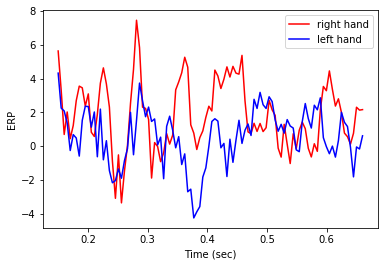

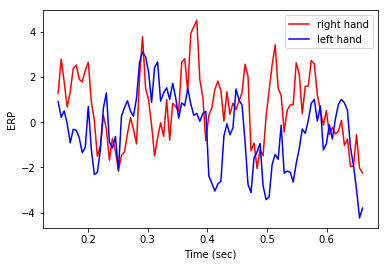

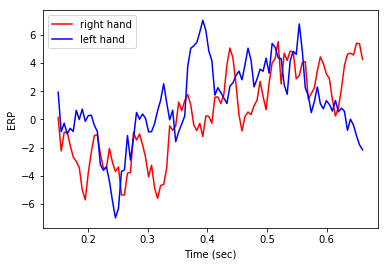

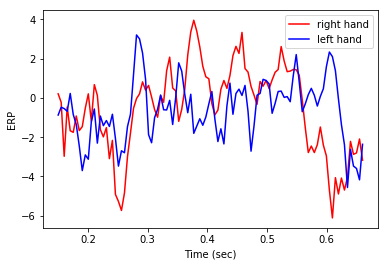

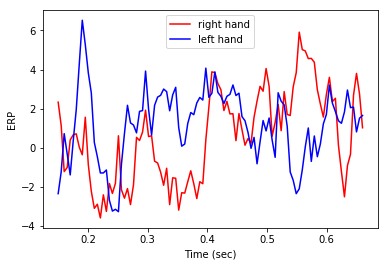

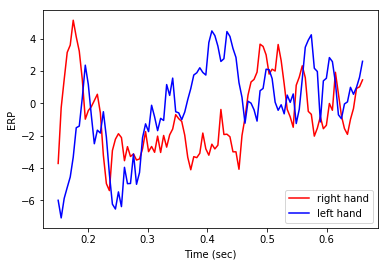

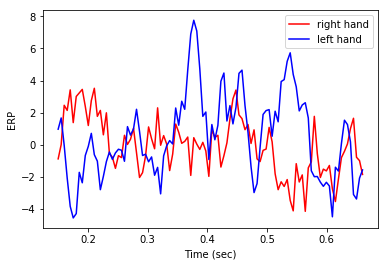

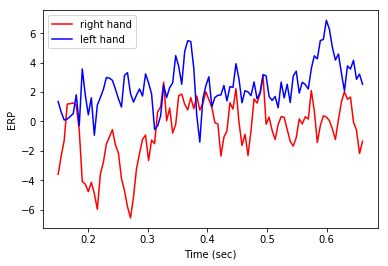

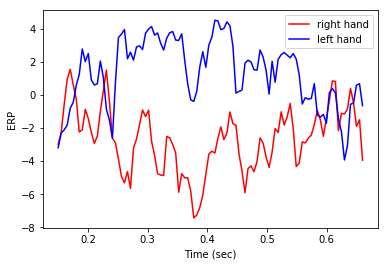

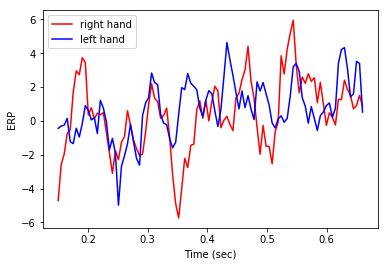

In [29]:
def plot_window(x, y_left, y_right):
    fig, ax = plt.subplots()
    ax.plot(x, y_right, color="red", label="right hand")
    ax.plot(x, y_left, color="blue", label="left hand")
    ax.legend()
    plt.xlabel("Time (sec)")
    plt.ylabel("ERP")
    plt.show()

for i in range(0,200,20):
    plot_window(seconds, X_train[y_train==0][i], X_train[y_train==1][i])

# X_train[y_train==1].shape

# fig, ax = plt.subplots()
# ax.plot(seconds, X_train[y_train==1][0], color="red", label="right hand")
# ax.plot(seconds, X_train[y_train==0][0], color="blue", label="left hand")
# ax.legend()
# plt.xlabel("Time (sec)")
# plt.ylabel("ERP")
# plt.show()

In [85]:
def train_svm(X_train, y_train):
    C = np.linspace(1e-10, 20, 40)
    params = {'C':C}
    svc = SVC()
    svc_gs = GridSearchCV(svc, params, cv=10, return_train_score=True, verbose=1, n_jobs=-1)
    res = svc_gs.fit(X_train, y_train)
    res1 = pd.DataFrame(res.cv_results_)
    columns = ["param_C","mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]
    return res1.loc[:,columns]
train_svm(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   13.5s finished


,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1e-10,0.532164,0.004163,0.532163,0.000465
1,0.512821,0.532164,0.004163,0.532163,0.000465
2,1.02564,0.532164,0.004163,1.000000,0.000000
3,1.53846,0.532164,0.004163,1.000000,0.000000
4,2.05128,0.532164,0.004163,1.000000,0.000000
5,2.5641,0.532164,0.004163,1.000000,0.000000
6,3.07692,0.532164,0.004163,1.000000,0.000000
7,3.58974,0.532164,0.004163,1.000000,0.000000
8,4.10256,0.532164,0.004163,1.000000,0.000000
9,4.61538,0.532164,0.004163,1.000000,0.000000


In [62]:
# keep_channels=['C3']
keep_channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

orig_interval_len = 1.5
X, y = get_data("../data/CLASubjectC1511263StLRHand.mat", orig_interval_len, keep_channels)
X = X[y != 3]
y = y[y != 3]
# 0 is left hand
y[y == 1] = 0
# 1 is right hand
y[y == 2] = 1 

interval_len = .52
offset = .15
X = trim_intervals(X, offset, interval_len)
print(X.shape)
num_channels= len(keep_channels)
d2 = np.ceil(num_channels * interval_len / 0.005).astype(int)
# X = X.reshape(642, d2)
print(X.shape)

# print(X[0,:,5:].shape)

# X_fta = np.real(np.fft.rfftn(X, s=(642, 1, 300), axes=(0,1,2)))
X_fta = np.fft.fft(X)
left = X_fta[y==0]
right = X_fta[y==1]
print(X_fta.shape)


CHANNEL NAMES:  ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5']
(642, 21, 104)
(642, 21, 104)
(642, 21, 104)


In [88]:
trial = X_fta[2]
def zero_phase_transform(trial):
    num_candidates = 100000
    # need to throw away one measure to use prev measure in normalization 
    num_features = trial.shape[0] - 1

#     print(trial.shape)
    prev_measure = trial[:len(trial) -1]
    trial = trial[1:]

    etas = np.linspace(-np.pi, np.pi, num_candidates)
    broadcasted = np.ones((num_features,num_candidates))
    broadcasted = etas * broadcasted
    prev_measure = prev_measure.reshape(-1,1)
    raise_to = np.multiply(prev_measure, broadcasted)
    transformed = np.exp(raise_to)
    angles = np.angle(transformed)
    abs_angles = np.abs(angles)
    sums = np.sum(abs_angles, axis=0)
    #         print("fast version:")
    minimum = np.min(sums)
    print("min: ",minimum)
    print("sums shape", sums.shape, etas.shape)
    print(" best eta: ", etas[sums == minimum])

    best_eta = etas[sums == minimum]
    best_eta=best_eta[0]
    transform_factors = np.exp(-1*(prev_measure)*best_eta)
    transform_factors = transform_factors.reshape(-1,)
#     print(transform_factors.shape, trial.shape)
    transformed_trial = np.multiply(trial, transform_factors)
    return transformed_trial
#         print("tr trial",transformed_trial.shape)

# def zero_phase_transform_slow(trial):
    

def zero_phase_transform_batch(batch):
    res = []
    for trial in batch:
        res.append(zero_phase_transform(trial))
    res = np.array(res)
    return res
# res_left = transform_batch(X_fta[y==0])
# res_right = transform_batch(X_fta[y==1])
res = zero_phase_transform_batch(X_fta)

ValueError: operands could not be broadcast together with shapes (2080,1) (20,100000) 

In [ ]:
res_1 = np.hstack((res.real, res.imag))
res.shape

In [ ]:
# res_left = np.mean(res_left, axis=0)
# res_right = np.mean(res_right, axis=0)

# My sampling rate is 200
# If in the time domain you have a sample rate of SR then in the frequency domain the points along 
# the x axis go from zero to one less than the sample rate; i.e. the frequency of the nth point 
# is f = (n-1) SR/N where N is the number of points. Here f is in Hz and the sample rate in samples per second.

def plot_transformed(res_left, res_right):
    sample_rate = 200
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
    x = np.linspace(0,sample_rate - 1, len(res_left) )
    ax1.plot(x, np.real(res_left), color="red", label="left")
    ax2.plot(x, np.imag(res_left), color="red", label="left")
    ax1.plot(x, np.real(res_right), color="blue", label="right")
    ax2.plot(x, np.imag(res_right), color="blue", label="right")
    ax1.legend()
    ax2.legend()

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("ERP??")
    plt.show()
    
# for i in range(0, 10):
#     plot_transformed(res_left[i], res_right[i])
    
print(len(res))
res = res
# X_train, X_test, y_train, y_test = train_test_split(res, y, train_size=0.8, test_size=0.2)
# train_svm(X_train, y_train)

many (642, 104)
Left1 (302, 104)
left (302, 21, 104)
EQ False
(340, 10)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


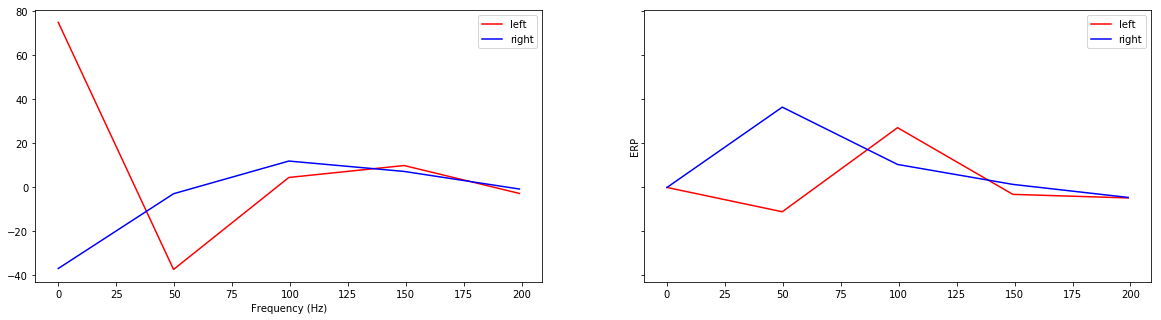

(642, 210)



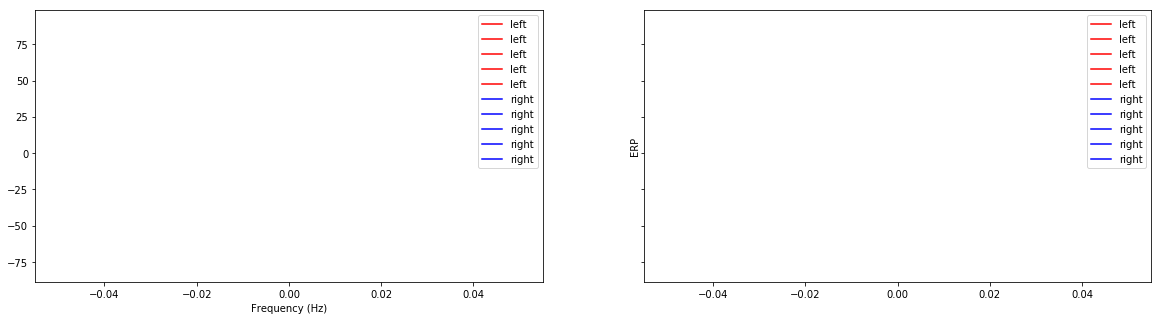

(105,)
left1 (104,)
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   14.9s finished


,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1e-10,0.547758,0.003172,0.547759,0.000355
1,0.512821,0.547758,0.003172,0.547759,0.000355
2,1.02564,0.547758,0.003172,1.000000,0.000000
3,1.53846,0.547758,0.003172,1.000000,0.000000
4,2.05128,0.547758,0.003172,1.000000,0.000000
5,2.5641,0.547758,0.003172,1.000000,0.000000
6,3.07692,0.547758,0.003172,1.000000,0.000000
7,3.58974,0.547758,0.003172,1.000000,0.000000
8,4.10256,0.547758,0.003172,1.000000,0.000000
9,4.61538,0.547758,0.003172,1.000000,0.000000


In [87]:
many_fft = X_fta[:,4,:]
print("many",many_fft.shape)
LEFT = y == 0
RIGHT = y == 1
left1 = many_fft[LEFT]
right1 = many_fft[RIGHT]
print("Left1",left1.shape)
print("left", left.shape)
print("EQ",left1 == left)
# left2 = np.hstack((np.real(left1[:,:5]), np.imag(left1[:,:5])))
# right2 = np.hstack((np.real(right1[:,:5]), np.imag(right1[:,:5])))
print(right2.shape)
left2_plot = np.mean(left1, axis=0)
right2_plot = np.mean(right1, axis=0)

left_plot = np.mean(left, axis=0)
right_plot = np.mean(right, axis=0)
# print(right2_plot)



def plot_fft(left_plot, right_plot):
    sample_rate = 200
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
    x = np.linspace(0,sample_rate - 1, len(left_plot))
    ax1.plot(x, np.real(left_plot), color="red", label="left")
    ax2.plot(x, np.imag(left_plot), color="red", label="left")
    ax1.plot(x, np.real(right_plot), color="blue", label="right")
    ax2.plot(x, np.imag(right_plot), color="blue", label="right")
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel("Frequency (Hz)")
    plt.ylabel("ERP")
    plt.show()
    
# plot_fft(left_plot, right_plot)
plot_fft(left2_plot[:5], right2_plot[:5])
# filtered = np.stack((np.real(X_fta[:,:,:5]), np.imag(X_fta[:,:,:5])), axis=2)
filtered = X_fta[:,:,:5]
filtered = np.stack((np.real(filtered), np.imag(filtered)), axis=2)
filtered = filtered.reshape(filtered.shape[0], filtered.shape[1], -1)
filtered = filtered.reshape(filtered.shape[0], -1)
# filtered = filtered.reshape(filtered.shape[0], -1)
# filtered = filtered[:,:,]
print(filtered.shape)
print()


left_filtered = np.mean(left_filtered, axis=0)
right_filtered = np.mean(right_filtered, axis=0)
plot_fft(left_filtered[5*4:5*5], right_filtered[5*4:5*5])
print(mean.shape)
# fleft = filtered[LEFT]
# fright = filtered[RIGHT]
print("left1",left1[0,:].shape)
# print("fleft",fleft[0,4,:])
# np.mean(fleft[:,4,], axis=0)
# plot_fft(np.mean(fleft[:,4,10*4:10*5], axis=0), np.mean(fright[:,4,10*4:10*5], axis=0))

# get mean of C4 for left and right
# plot

# replicate out of reshaped




# print(np.real(left_plot)[:10])
# print(np.real(right_plot)[:10])
# for i in range(0, 10):
#     plot_transformed(left[i], right[i])

# filtered = np.hstack((np.real(X_fta[:,:]), np.imag(X_fta[:,:])))
# filtered.shape
# print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(filtered, y, train_size=0.8, test_size=0.2)
train_svm(X_train, y_train)

In [ ]:
# b is eta values
b = np.array([1,2,3,4,5])
# broadcasted
c = np.array([[10,10,10,10,10],[100,100,100,100,100]])
np.multiply(b,c)

In [ ]:
b = -58.24564459755905 -42.631125226128475j
c = 640.24+0j
np.exp(-1*c*(-1.84466262))
np.exp(1200
      )

In [ ]:
etas = np.linspace(-np.pi, np.pi, 500)
d = np.ones((10, 500))
np.multiply(d, etas)

np.exp(-3)

In [ ]:
num_candidates = 5000
etas = np.linspace(-np.pi, np.pi, num_candidates)
broadcasted = np.ones((199,num_candidates))
broadcasted = etas * broadcasted
a = np.array([i for i in range(0,199)])
a=a.reshape(-1,1)
print("broa", broadcasted.shape)
raise_to = np.multiply(a, broadcasted)
transformed = np.exp(raise_to)
sums = np.sum(transformed, axis=0)
np.min(sums)

In [3]:
a = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
len(a)

22